In [119]:
%load_ext autoreload
%autoreload 2

import sys, os
import requests
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

sys.path.append(r"C:\Users\micha\OneDrive\Documents\code\submodule\\")
import fred
import assist


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
df = fred.get_macro_factors()

In [121]:
df.to_pickle(r'C:\\Users\\micha\\OneDrive\\Documents\\data\\fred_macro_data.pkl')

In [122]:
df = df.replace([np.inf, -np.inf], np.nan)
df.tail()

,NFP_CHG,ADP_CHG,UNEMP_CHG,UNEMP_LVL,GDP_QOQ,RGDP_QOQ,CPI_MOM,CPI_YOY,CCPI_MOM,CCPI_YOY,...,NEWHOME_MOM,TRADE_QOQ,EXRATE,WHOLESALE_INV_LVL,CORP_SPREAD_LVL,LABOR_FORCE_MOM,JOB_OPENINGS_MOM,LEADING_MOM,SP500,VIX_LVL
date,,,,,,,,,,,,,,,,,,,,,
2025-06-30,-13.0,-23.0,-0.1,4.1,0.060387,0.03838,0.002870,0.026727,0.002282,0.029079,...,7.814992,-16.916025,119.8269,1.29,1.75,-0.076242,-4.603216,9.55414,13.633783,16.73
2025-07-31,79.0,104.0,0.1,4.2,0.060387,0.03838,0.001966,0.027318,0.003223,0.030486,...,-1.775148,32.537318,122.1088,1.28,1.67,-0.022303,-2.025282,9.55414,14.796190,16.72
2025-08-31,22.0,-3.0,0.1,4.3,0.060387,0.03838,0.003825,0.029392,0.003460,0.031122,...,20.481928,32.537318,120.6028,1.28,1.80,0.255956,0.263596,9.55414,14.373274,15.36
2025-09-30,22.0,-32.0,0.1,4.3,0.060387,0.03838,0.003825,0.029392,0.003460,0.031122,...,20.481928,32.537318,120.5624,1.28,1.67,0.255956,0.263596,9.55414,16.069123,16.28
2025-10-31,22.0,-32.0,0.1,4.3,0.060387,0.03838,0.003825,0.029392,0.003460,0.031122,...,20.481928,32.537318,120.5163,1.28,1.69,0.255956,0.263596,9.55414,17.687299,21.66


In [123]:
# assist.first_not_null_date(df)

# Cycles

In [124]:
cycles = fred.get_economic_cycles("USREC", observation_start="1947-01-01")
cycles

,start_date,end_date,n_periods,is_recession,label
0,1947-01-01,1948-11-01,23,0,expansion
1,1948-12-01,1949-10-01,11,1,recession
2,1949-11-01,1953-07-01,45,0,expansion
3,1953-08-01,1954-05-01,10,1,recession
4,1954-06-01,1957-08-01,39,0,expansion
5,1957-09-01,1958-04-01,8,1,recession
6,1958-05-01,1960-04-01,24,0,expansion
7,1960-05-01,1961-02-01,10,1,recession
8,1961-03-01,1969-12-01,106,0,expansion
9,1970-01-01,1970-11-01,11,1,recession


In [125]:
N=3
cycles_sliced = fred.get_economic_cycle_slices("USREC", observation_start="1947-01-01", n_years=N, which='last')
cycles_sliced = cycles_sliced[cycles_sliced['full_n_periods']>12*N]
cycles_sliced

,start_date,end_date,full_start,full_end,is_recession,label,full_n_periods,slice_n_days
2,1950-07-02,1953-07-01,1949-11-01,1953-07-01,0,expansion,45,1096
4,1954-08-02,1957-08-01,1954-06-01,1957-08-01,0,expansion,39,1096
8,1966-12-02,1969-12-01,1961-03-01,1969-12-01,0,expansion,106,1096
12,1977-01-02,1980-01-01,1975-04-01,1980-01-01,0,expansion,58,1095
16,1987-07-02,1990-07-01,1982-12-01,1990-07-01,0,expansion,92,1096
18,1998-03-02,2001-03-01,1991-04-01,2001-03-01,0,expansion,120,1096
20,2004-12-02,2007-12-01,2001-12-01,2007-12-01,0,expansion,73,1095
22,2017-02-02,2020-02-01,2009-07-01,2020-02-01,0,expansion,128,1095
24,2022-10-14,2025-10-13,2020-05-01,2025-10-13,0,expansion,1992,1096


In [126]:
df_sub = df[['UNEMP_LVL', 'GDP_QOQ', 'RGDP_QOQ',
       'CPI_YOY', 'CCPI_YOY', 'PCE_YOY',
       'CPCE_YOY', 'M2_YOY', 'INDPRO_YOY', 'UMICH_LVL', 
       'AHE_YOY', 'LABOR_PROD_YOY', 'PAT_YOY', 'FEDFUNDS_LVL', 'GS10_LVL', 'DTB3_LVL',
       'TRADE_QOQ',  'WHOLESALE_INV_LVL',
       'CORP_SPREAD_LVL', 'LABOR_FORCE_MOM', 'JOB_OPENINGS_MOM', 'LEADING_MOM', 'VIX_LVL']]

In [127]:
X_cycles = fred.get_cycle_feature_matrix(df_sub, cycles)
# X_cycles.tail()

## view

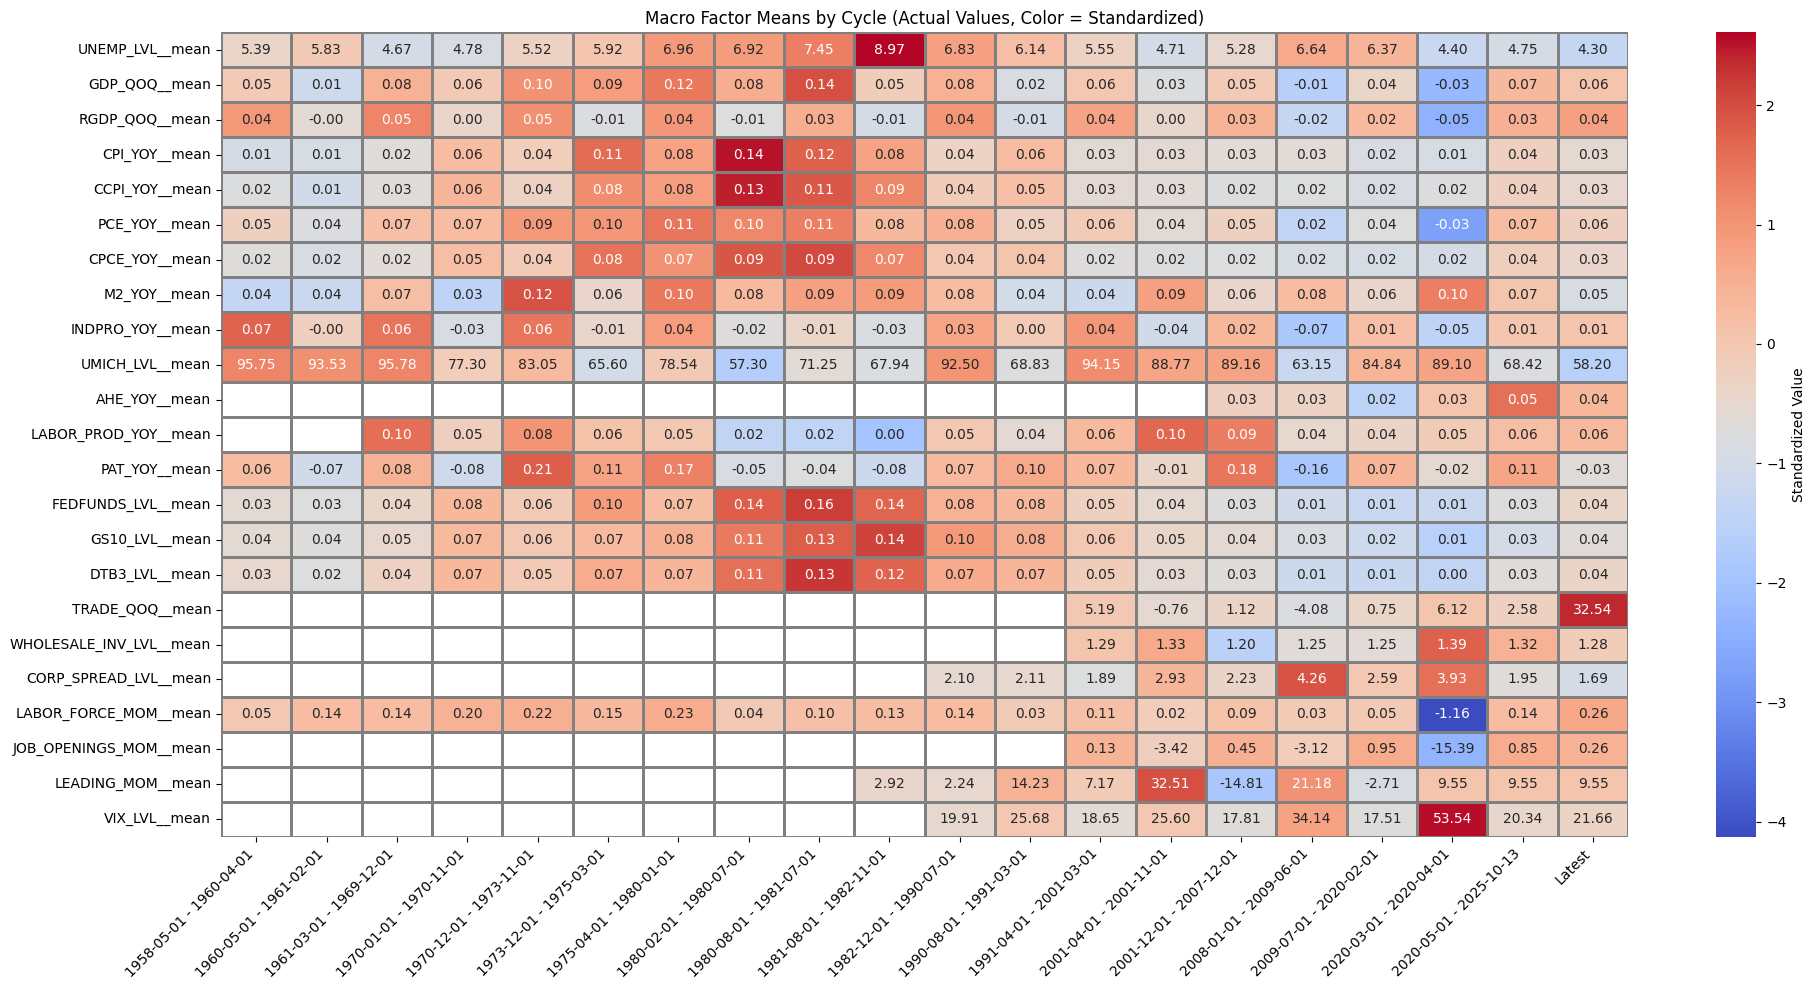

In [129]:
mean_cols = [c for c in X_cycles.columns if '_mean' in c]
X_sub = X_cycles[mean_cols]
X_sub_std = (X_sub - X_sub.mean()) / X_sub.std()

plt.figure(figsize=(20, 10))
ax = sns.heatmap(
    X_sub_std.T,  # colors based on standardized values
    cmap="coolwarm",
    annot=X_sub.T,  # show actual values as annotation
    fmt=".2f",
    linewidths=1, 
    linecolor='grey', 
    xticklabels=X_sub.index,
    yticklabels=X_sub.columns,
    cbar_kws={'label': 'Standardized Value'},
    # annot_kws={"weight": "bold"} 
)

plt.title("Macro Factor Means by Cycle (Actual Values, Color = Standardized)")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## fit model

In [133]:
Y_label = 'Latest'
# Y_label = '2020-05-01 - 2025-10-13'

# cols = [c for c in X_cycles.columns if '_mean' in c]
# X_cycles = X_cycles[cols]

X_latest = X_cycles.loc[[Y_label]]

imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()
K = 6
pca = PCA(n_components=0.95, random_state=0)  # keep 95% variance
nn = NearestNeighbors(n_neighbors=min(K, len(X_cycles)), metric="euclidean")

X_cycles_hist = X_cycles.drop(Y_label)
X_cycles_hist = X_cycles_hist.replace([np.inf, -np.inf], np.nan)

Xc_imp = imputer.fit_transform(X_cycles_hist)
Xc_scl = scaler.fit_transform(Xc_imp)
Xc_pca = pca.fit_transform(Xc_scl)
nn.fit(Xc_pca)

print(pca.explained_variance_ratio_)
print(pca.n_components_)

Xl_imp = imputer.transform(X_latest)
Xl_scl = scaler.transform(Xl_imp)
Xl_pca = pca.transform(Xl_scl)
Xc_scl_df = pd.DataFrame(Xc_scl, index=X_cycles_hist.index, columns=X_cycles_hist.columns)

dists, idxs = nn.kneighbors(Xl_pca, return_distance=True)
labels = list(X_cycles_hist.index)
top_k = min(K, len(labels))

cycle_type_lookup = {}
for idx, row in cycles.iterrows():
    cycle_label = f"{row['start_date'].date()} - {row['end_date'].date()}"
    cycle_type_lookup[cycle_label] = row["label"].lower()

nearest = [
    (labels[i], float(d), cycle_type_lookup.get(labels[i], "unknown"))
    for i, d in zip(idxs[0][:top_k], dists[0][:top_k])
]
nearest

[0.19163572 0.17859821 0.14730311 0.09923304 0.07196089 0.06061482
 0.05244671 0.04373528 0.03443378 0.0286783  0.02436306 0.01822744]
12


[('2020-03-01 - 2020-04-01', 9.485891876952428, 'recession'),
 ('1991-04-01 - 2001-03-01', 9.88807086105784, 'expansion'),
 ('1970-01-01 - 1970-11-01', 10.307676414425, 'recession'),
 ('1982-12-01 - 1990-07-01', 10.922828464419178, 'expansion'),
 ('1960-05-01 - 1961-02-01', 11.046940672241607, 'recession'),
 ('1990-08-01 - 1991-03-01', 11.338417746634686, 'recession')]

## top contributors

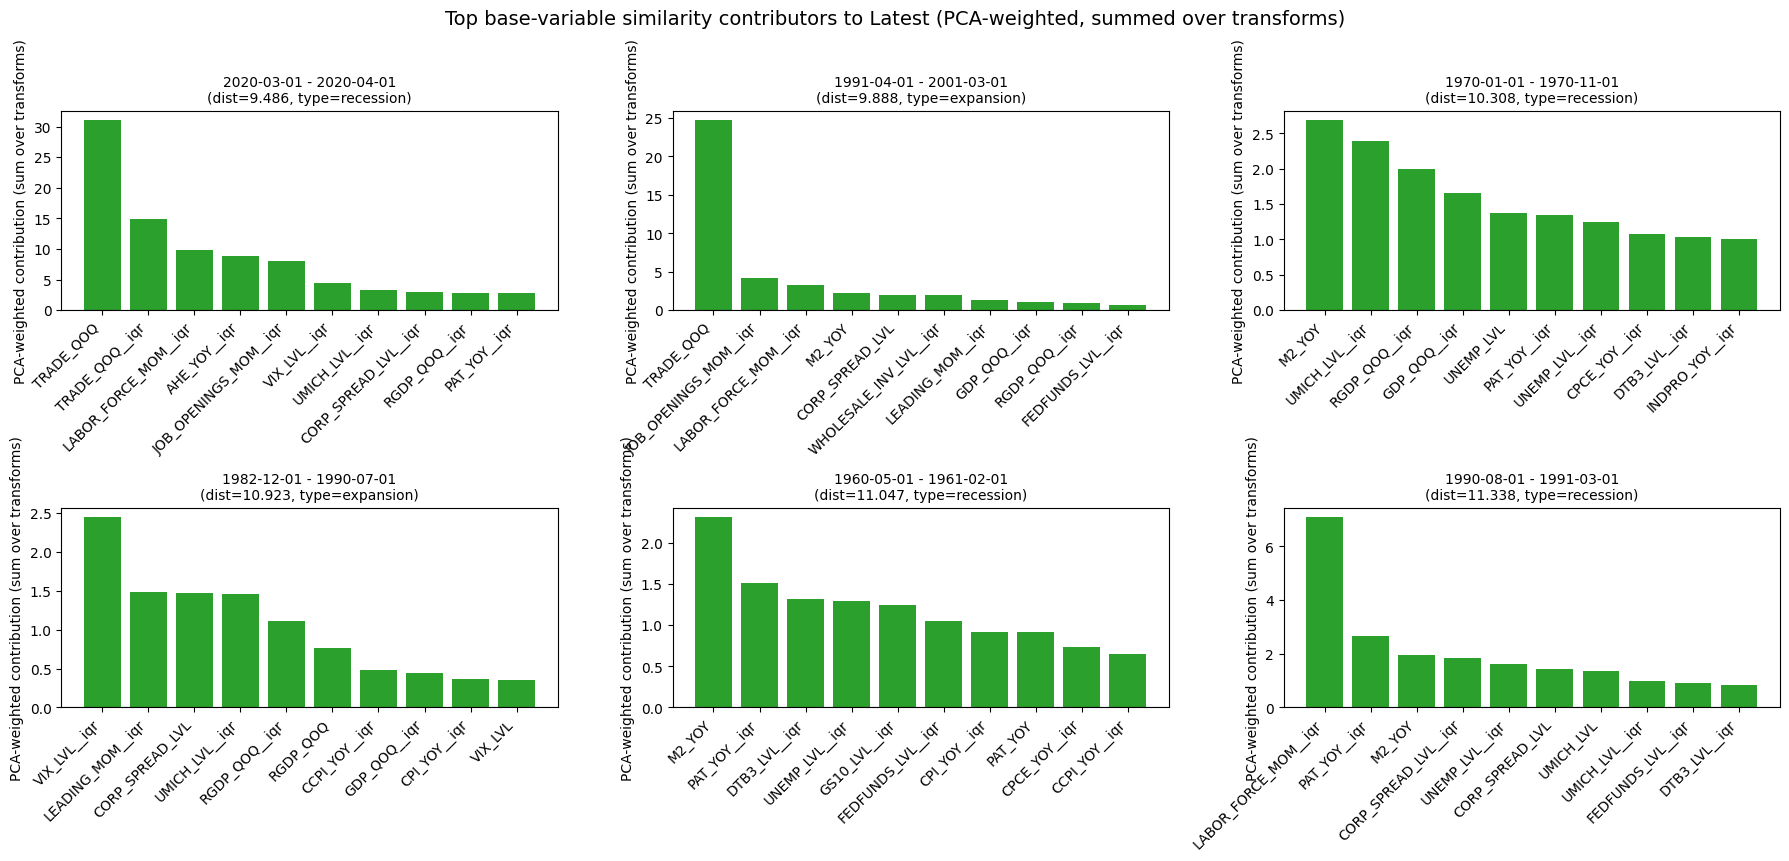

In [134]:
import math

TOP_N_BASES = 10  # top base variables to show per period

assert 'nearest' in globals(), "Run the KNN cell first."
assert all(v in globals() for v in ['labels','Xc_scl','Xl_scl','X_cycles','pca','Y_label']), "Missing prerequisites."

feat_index = pd.Index(X_cycles.columns)

# Parse columns into base variable and transform suffix
KNOWN_STATS = {'mean','std','min','max','last','q10','q90','median','slope','skew','kurt'}

def split_col(c: str):
    parts = c.rsplit('_', 1)
    if len(parts) == 2 and parts[1] in KNOWN_STATS:
        base, stat = parts[0], parts[1]
    else:
        base, stat = c, 'value'  # no explicit transform suffix
    base = base.rstrip('_')  # remove any trailing underscore from base name
    return base, stat

meta = pd.DataFrame({'col': feat_index})
meta[['base','stat']] = meta['col'].apply(lambda c: pd.Series(split_col(c)))
meta = meta.set_index('col')

# PCA feature weights: sum of squared loadings per feature across retained PCs
if hasattr(pca, "components_"):
    pca_weights = pd.Series((pca.components_ ** 2).sum(axis=0), index=feat_index)
    pca_weights = pca_weights / max(pca_weights.mean(), 1e-12)
else:
    pca_weights = pd.Series(1.0, index=feat_index)

latest_vec_std = pd.Series(Xl_scl[0], index=feat_index)

# ---------- Figure 1: Aggregated contributions by base variable ----------
n_nearest = len(nearest)
n_cols = min(3, max(1, n_nearest))
n_rows = (n_nearest + n_cols - 1) // n_cols

fig_base, axes_base = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4.2*n_rows), squeeze=False)
fig_base.suptitle(f"Top base-variable similarity contributors to {Y_label} (PCA-weighted, summed over transforms)", y=1.02, fontsize=14)

for k, (lab, dist, ctype) in enumerate(nearest):
    r, c = divmod(k, n_cols)
    ax = axes_base[r][c]
    hist_idx = labels.index(lab)
    nearest_vec_std = pd.Series(Xc_scl[hist_idx], index=feat_index)

    contrib = (latest_vec_std * nearest_vec_std) * pca_weights  # per original column
    dfc = meta.join(contrib.rename('contrib'))
    base_sum = dfc.groupby('base')['contrib'].sum().sort_values(ascending=False).head(TOP_N_BASES)

    colors = ["#2ca02c" if v >= 0 else "#d62728" for v in base_sum.values]
    ax.bar(base_sum.index, base_sum.values, color=colors)
    ax.set_title(f"{lab}\n(dist={dist:.3f}, type={ctype})", fontsize=10)
    ax.set_ylabel("PCA-weighted contribution (sum over transforms)")
    ax.tick_params(axis='x', rotation=45)
    # center align x-axis tick labels
    for tick in ax.get_xticklabels():
        tick.set_ha('right')
    ax.axhline(0, color="black", lw=0.8, alpha=0.6)

# Hide unused axes
for j in range(n_nearest, n_rows*n_cols):
    r, c = divmod(j, n_cols)
    axes_base[r][c].axis('off')

fig_base.tight_layout()
plt.show()


## top contributors per transform

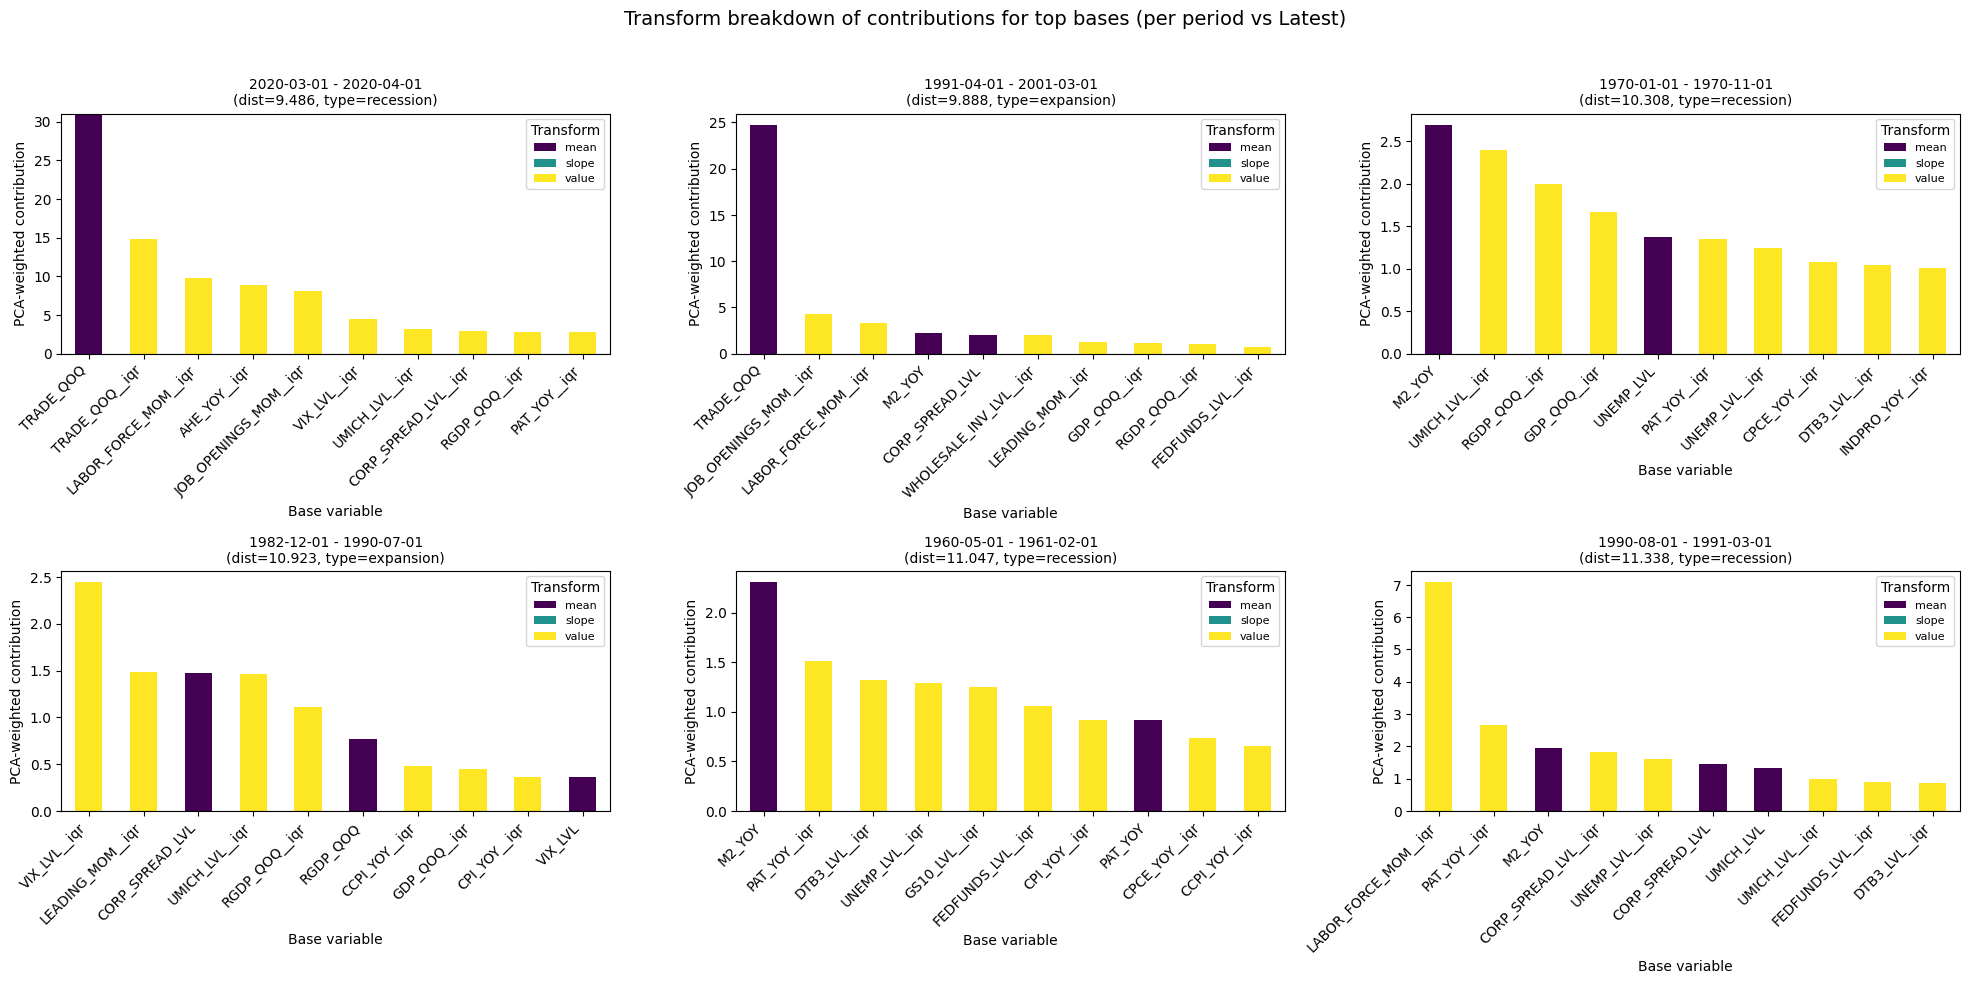

In [135]:

# ---------- Figure 2: Stacked breakdown by transform for the same top bases ----------
fig_stack, axes_stack = plt.subplots(n_rows, n_cols, figsize=(6.6*n_cols, 4.8*n_rows), squeeze=False)
fig_stack.suptitle(f"Transform breakdown of contributions for top bases (per period vs {Y_label})", y=1.02, fontsize=14)

for k, (lab, dist, ctype) in enumerate(nearest):
    r, c = divmod(k, n_cols)
    ax = axes_stack[r][c]
    hist_idx = labels.index(lab)
    nearest_vec_std = pd.Series(Xc_scl[hist_idx], index=feat_index)

    contrib = (latest_vec_std * nearest_vec_std) * pca_weights
    dfc = meta.join(contrib.rename('contrib'))

    # Select top bases by aggregated contribution
    base_sum = dfc.groupby('base')['contrib'].sum().sort_values(ascending=False).head(TOP_N_BASES)
    top_bases = base_sum.index

    # Pivot to stacked contributions by transform
    stacked = (dfc[dfc['base'].isin(top_bases)]
               .pivot_table(index='base', columns='stat', values='contrib', aggfunc='sum')
               .reindex(top_bases)
               .fillna(0.0))

    stacked.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
    ax.set_title(f"{lab}\n(dist={dist:.3f}, type={ctype})", fontsize=10)
    ax.set_xlabel("Base variable")
    ax.set_ylabel("PCA-weighted contribution")
    ax.tick_params(axis='x', rotation=45)
    for tick in ax.get_xticklabels():
        tick.set_ha('right')
    ax.axhline(0, color="black", lw=0.8, alpha=0.6)
    ax.legend(title="Transform", fontsize=8, frameon=True)

# Hide unused axes
for j in range(n_nearest, n_rows*n_cols):
    r, c = divmod(j, n_cols)
    axes_stack[r][c].axis('off')

fig_stack.tight_layout()
plt.show()


## z-scores

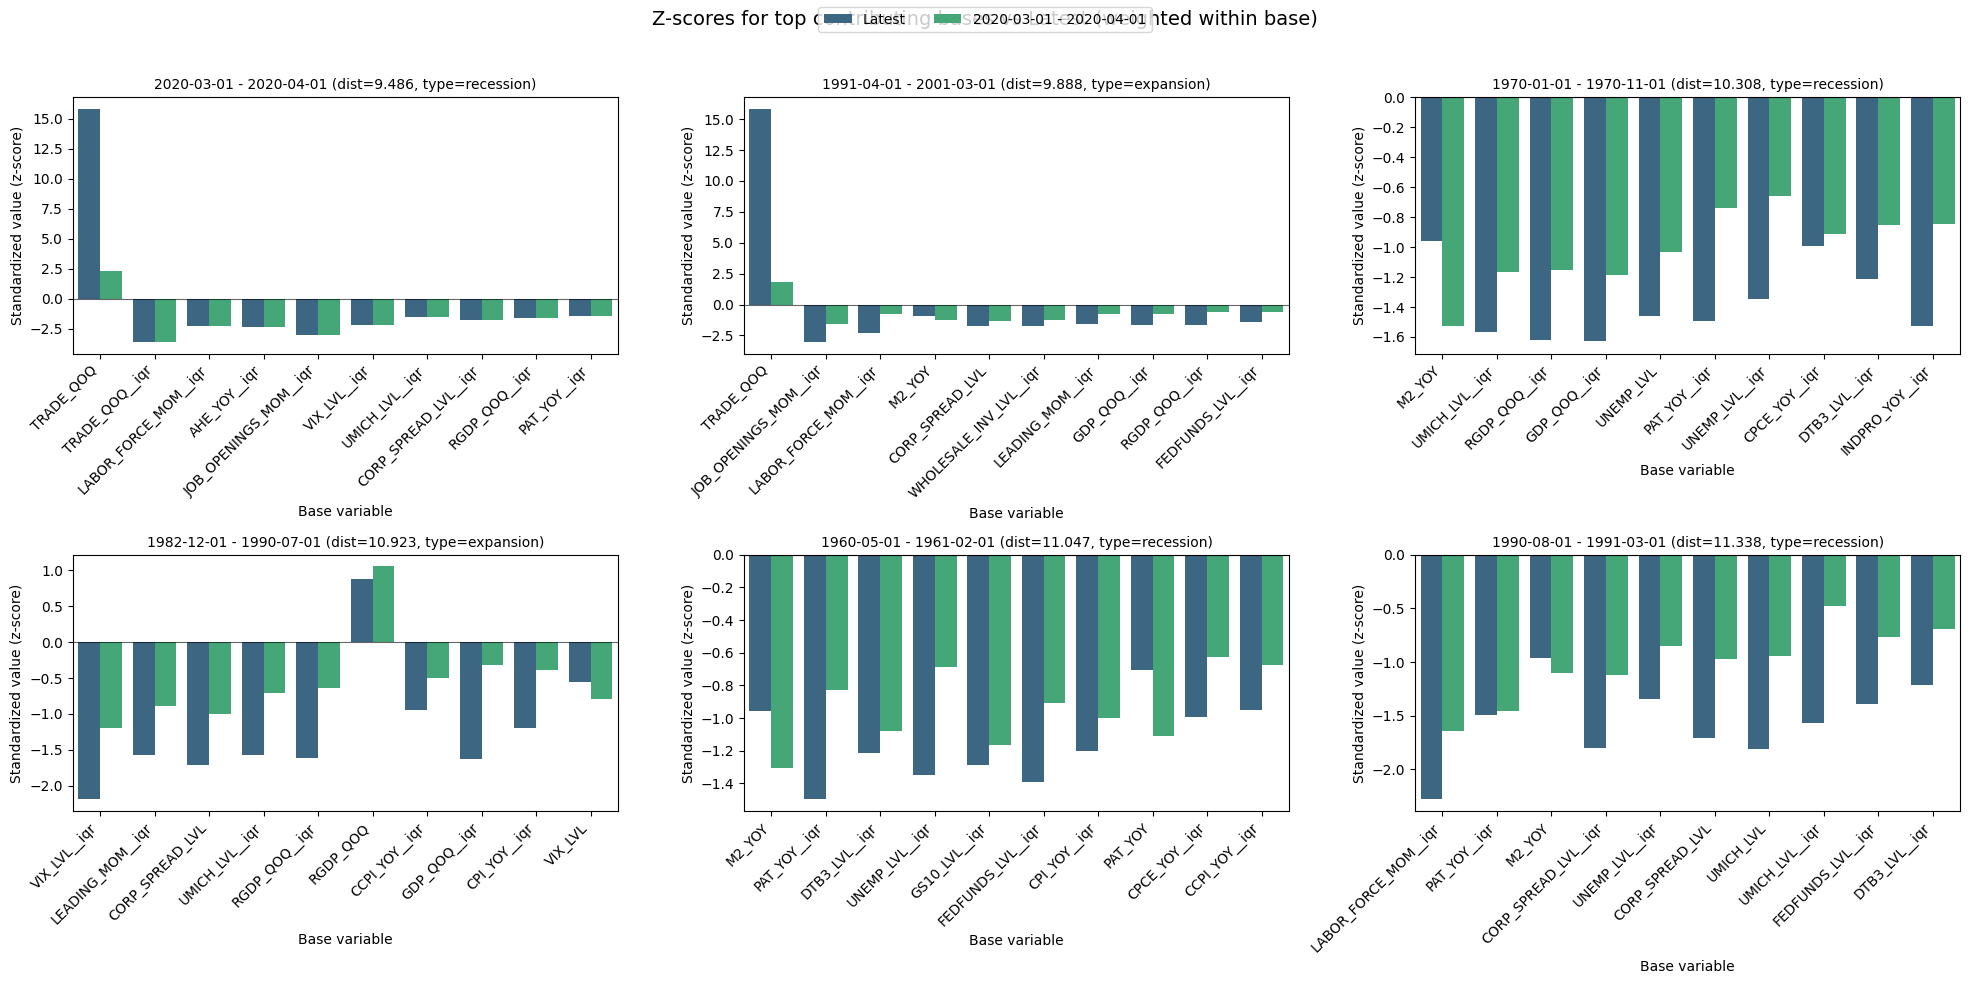

In [136]:
# ---------- Figure 2: Z-score comparison for the same top bases (aggregated across transforms) ----------
""" 
Meaning in your setup:

Each feature is one number per period (e.g., CPI_YOY_mean for 1961–1969).
StandardScaler was fit across all historical periods, so per feature f: z(f, period) = (value_f(period) − mean_f(all periods)) / std_f(all periods)
Latest gets the same transform using those historical mean/std.
When “comparing Latest to 1961–1969”:

You’re not getting a pairwise z; you’re seeing where each sits in the cross-period distribution.
If both z-scores are positive (or both negative), they align in direction; larger magnitudes mean they’re similarly extreme relative to history.
Small absolute difference in z-scores ⇒ similar level; opposite signs ⇒ opposite regimes on that feature.
Interpretation cues:

Same sign, similar magnitude: feature likely contributed to similarity.
Opposite sign: feature worked against similarity.
Very large |z| for only one of them: mismatch on that feature.
Limitations:

No within-period variability is shown (each period is a single aggregate).
"""
fig_z, axes_z = plt.subplots(n_rows, n_cols, figsize=(6.6*n_cols, 4.8*n_rows), squeeze=False)
fig_z.suptitle(f"Z-scores for top contributing bases vs {Y_label} (weighted within base)", y=1.02, fontsize=14)

legend_handles = None
legend_labels = None

EPS = 1e-12

for k, (lab, dist, ctype) in enumerate(nearest):
    r, c = divmod(k, n_cols)
    ax = axes_z[r][c]
    hist_idx = labels.index(lab)
    nearest_vec_std = pd.Series(Xc_scl[hist_idx], index=feat_index)

    # Per-feature contribution and weights
    contrib = (latest_vec_std * nearest_vec_std) * pca_weights
    dfc = meta.join(pd.DataFrame({
        'latest_z': latest_vec_std,
        'nearest_z': nearest_vec_std,
        'contrib': contrib,
        'weight': contrib.abs()  # emphasize features that actually drove similarity
    }))

    # Pick top bases by aggregated contribution
    base_sum = dfc.groupby('base')['contrib'].sum().sort_values(ascending=False).head(TOP_N_BASES)
    top_bases = base_sum.index

    # Weighted average z-scores within each base using |contrib| weights
    gb = dfc[dfc.index.isin(dfc.index)].groupby(dfc['base'])
    latest_base = gb.apply(lambda g: (g['latest_z'] * g['weight']).sum() / max(g['weight'].sum(), EPS))
    nearest_base = gb.apply(lambda g: (g['nearest_z'] * g['weight']).sum() / max(g['weight'].sum(), EPS))

    plot_df = pd.DataFrame({
        'base': top_bases,
        'Latest': latest_base.reindex(top_bases).values,
        lab:     nearest_base.reindex(top_bases).values
    })
    long_df = plot_df.melt(id_vars='base', var_name='series', value_name='zscore')

    sns.barplot(data=long_df, x='base', y='zscore', hue='series', palette='viridis', ax=ax)
    ax.set_title(f"{lab} (dist={dist:.3f}, type={ctype})", fontsize=10)
    ax.set_xlabel("Base variable")
    ax.set_ylabel("Standardized value (z-score)")
    ax.tick_params(axis='x', rotation=45)
    for tick in ax.get_xticklabels():
        tick.set_ha('right')
    ax.axhline(0, color="black", lw=0.8, alpha=0.6)

    if legend_handles is None:
        handles, labels_ = ax.get_legend_handles_labels()
        legend_handles, legend_labels = handles, labels_
    ax.legend_.remove()

# Hide unused axes
for j in range(n_nearest, n_rows*n_cols):
    r, c = divmod(j, n_cols)
    axes_z[r][c].axis('off')

if legend_handles:
    fig_z.legend(legend_handles, legend_labels, loc="upper center", ncol=2, frameon=True)

fig_z.tight_layout()
plt.show()

## top detractors

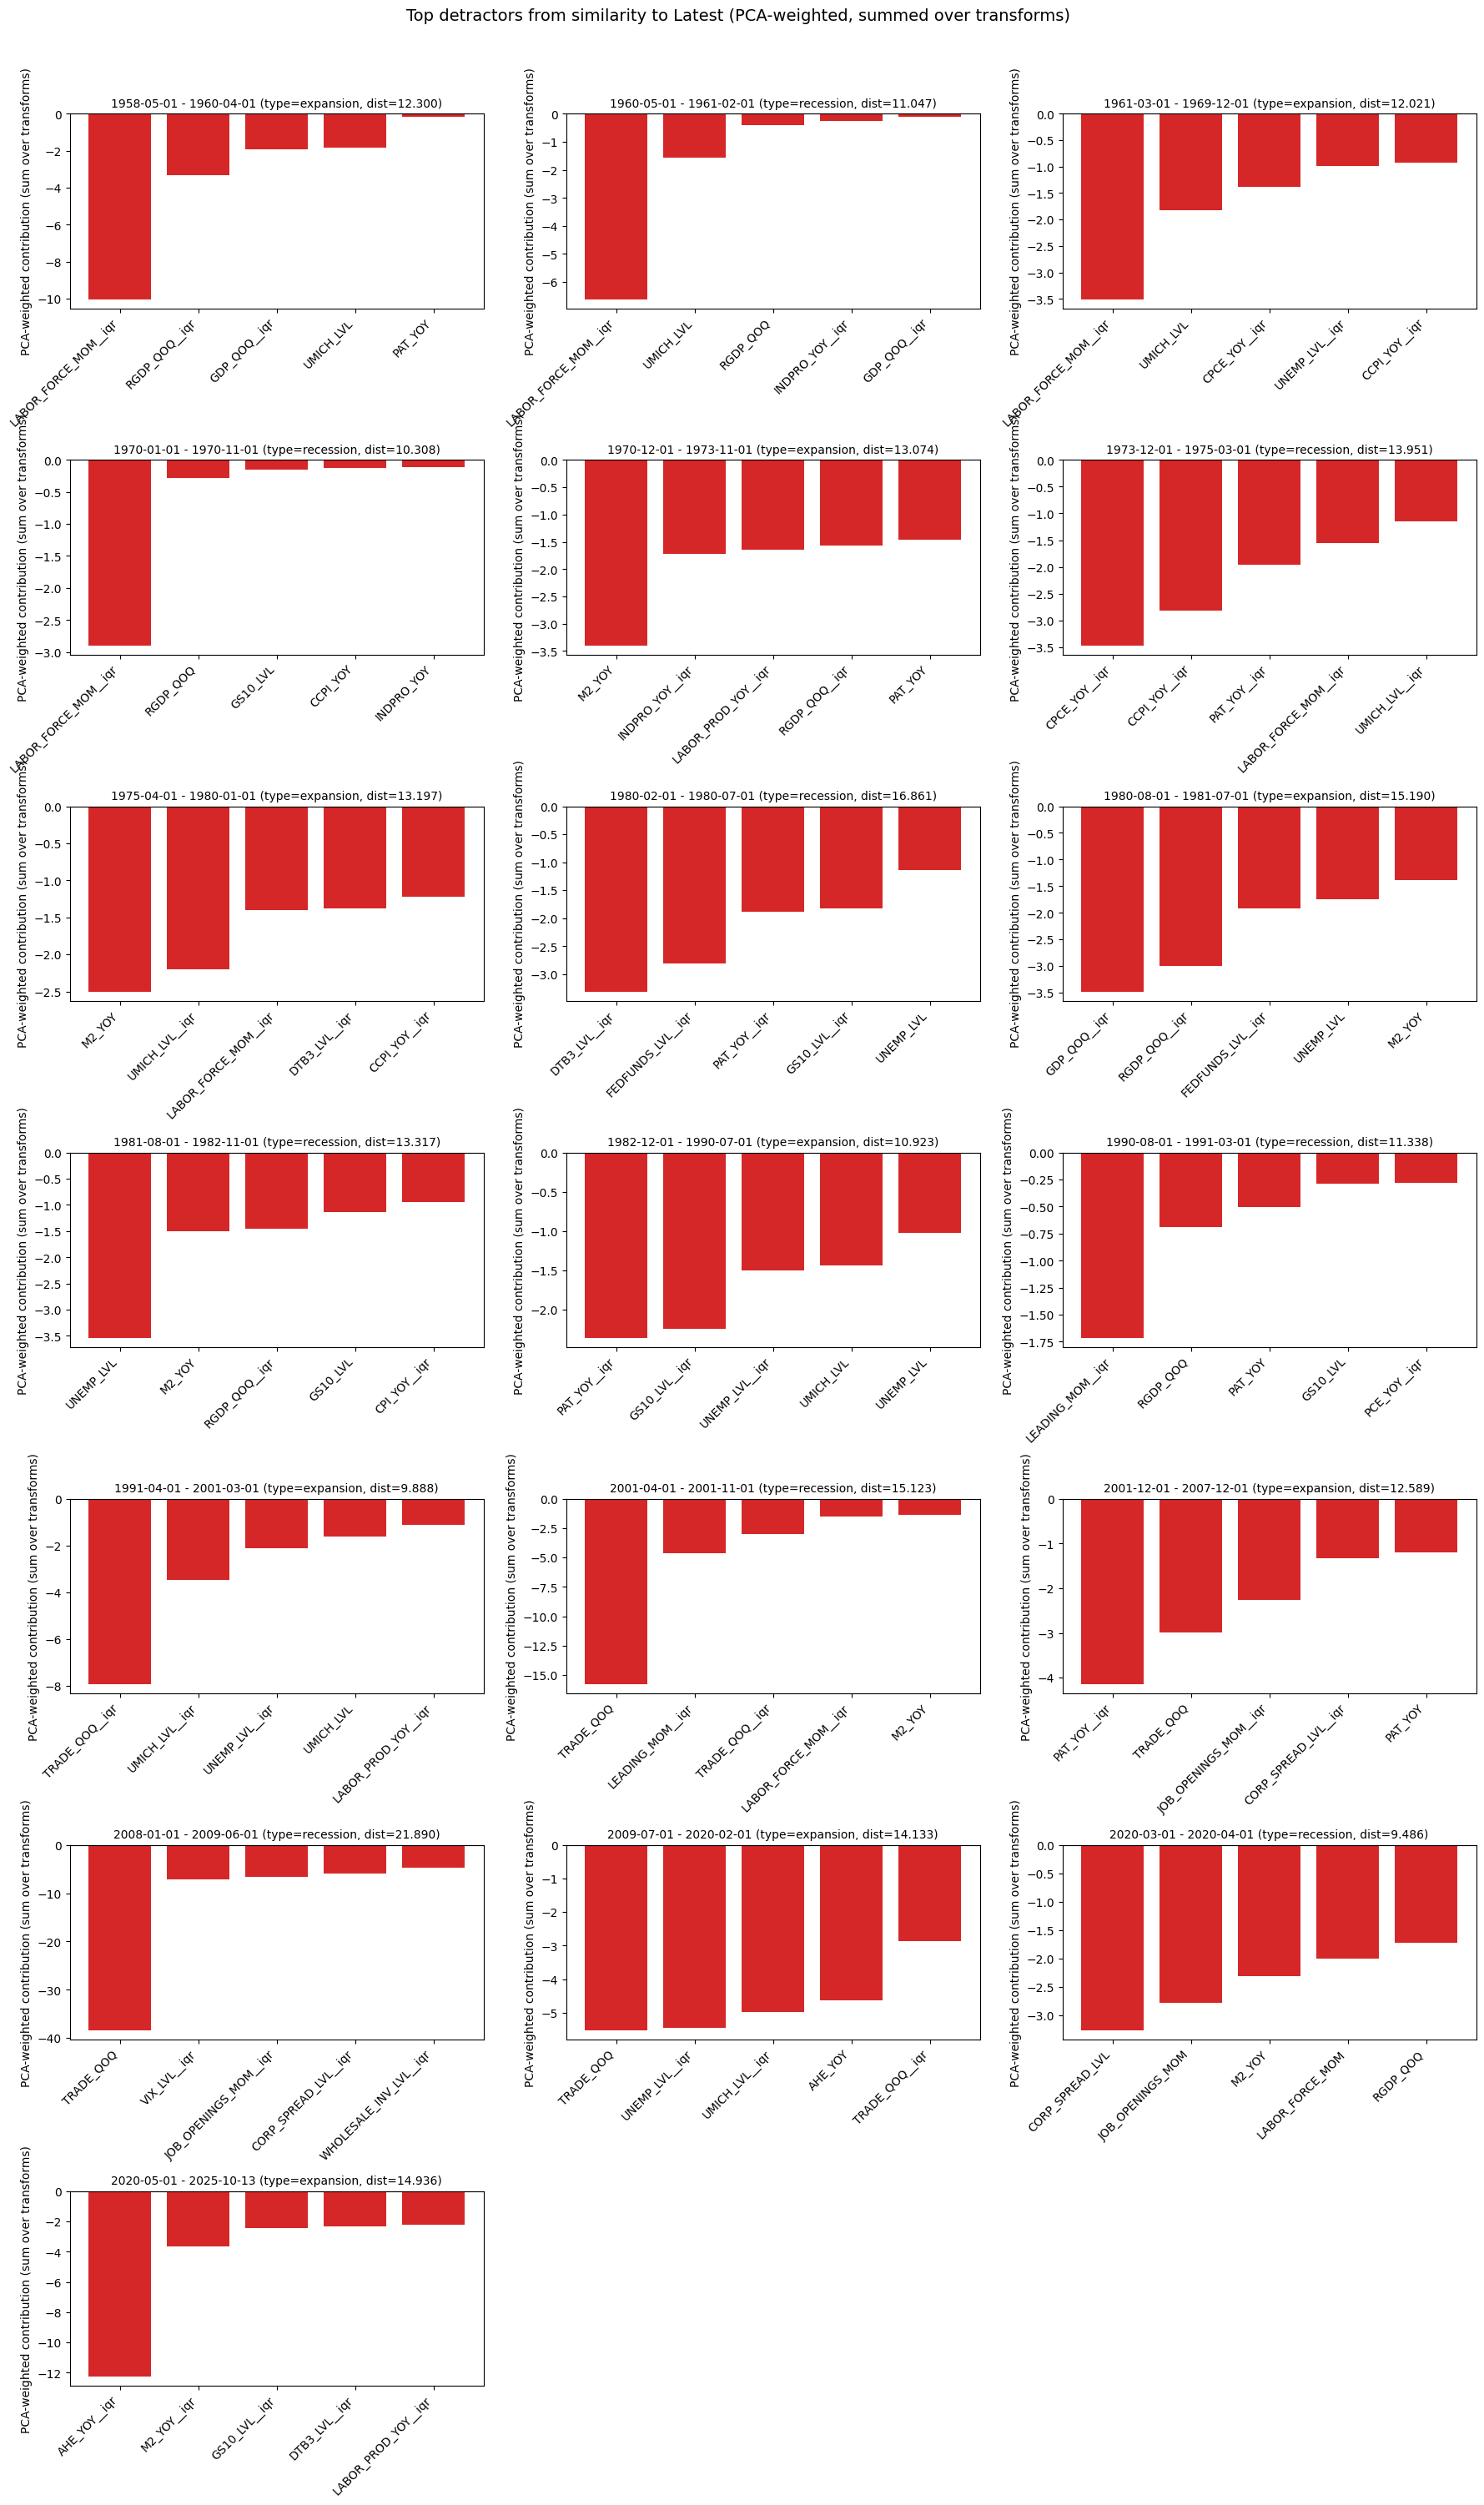

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Top detractors from similarity (sum over transforms per base)
TOP_N_DETRACTORS = 5
PLOT_ALL_CYCLES = True  # False = only nearest; True = all historical cycles
EPS = 1e-12

# prerequisites
assert all(v in globals() for v in ['nearest','labels','Xc_scl','Xl_scl','X_cycles','pca','Y_label','cycles']), "Missing prerequisites."

feat_index = pd.Index(X_cycles.columns)

# Parse columns into base variable and transform suffix
KNOWN_STATS = {'mean','std','min','max','last','q10','q90','median','slope','skew','kurt'}
def split_col(c: str):
    parts = c.rsplit('_', 1)
    if len(parts) == 2 and parts[1] in KNOWN_STATS:
        base, stat = parts[0], parts[1]
    else:
        base, stat = c, 'value'
    base = base.rstrip('_')
    return base, stat

meta = pd.DataFrame({'col': feat_index})
meta[['base','stat']] = meta['col'].apply(lambda c: pd.Series(split_col(c)))
meta = meta.set_index('col')

# PCA feature weights: sum of squared loadings per feature across retained PCs
if hasattr(pca, "components_"):
    pca_weights = pd.Series((pca.components_ ** 2).sum(axis=0), index=feat_index)
    pca_weights = pca_weights / max(pca_weights.mean(), EPS)
else:
    pca_weights = pd.Series(1.0, index=feat_index)

latest_vec_std = pd.Series(Xl_scl[0], index=feat_index)

# Build cycle type lookup to annotate titles
cycle_type_lookup = {}
start_col = next((c for c in cycles.columns if 'start' in c.lower()), cycles.columns[0])
end_col   = next((c for c in cycles.columns if 'end'   in c.lower()), cycles.columns[1])
for _, row in cycles.iterrows():
    lab = f"{row[start_col].date()} - {row[end_col].date()}"
    cycle_type_lookup[lab] = str(row['label']).lower() if 'label' in cycles.columns else 'unknown'

# Choose periods to plot
if PLOT_ALL_CYCLES:
    periods = list(labels)
else:
    periods = [lab for lab, _, _ in nearest]

# Optional: compute distances in PCA space for all labels (if available)
dist_by_label = {}
if 'Xc_pca' in globals() and 'Xl_pca' in globals():
    for i, lab in enumerate(labels):
        dist_by_label[lab] = float(np.linalg.norm(Xc_pca[i] - Xl_pca[0]))

# Layout
n = len(periods)
n_cols = min(3, max(1, int(np.ceil(np.sqrt(n)))))
n_rows = int(np.ceil(n / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4.2*n_rows), squeeze=False)
fig.suptitle(f"Top detractors from similarity to {Y_label} (PCA-weighted, summed over transforms)", y=1.02, fontsize=14)

for k, lab in enumerate(periods):
    r, c = divmod(k, n_cols)
    ax = axes[r][c]
    hist_idx = labels.index(lab)
    period_vec_std = pd.Series(Xc_scl[hist_idx], index=feat_index)

    # Per-feature contribution to similarity in z space
    contrib = (latest_vec_std * period_vec_std) * pca_weights
    dfc = meta.join(contrib.rename('contrib'))

    # Aggregate by base and select the most negative (detractors)
    base_sum = dfc.groupby('base')['contrib'].sum()
    detractors = base_sum[base_sum < 0].sort_values(ascending=True).head(TOP_N_DETRACTORS)
    if detractors.empty:
        detractors = base_sum.sort_values(ascending=True).head(TOP_N_DETRACTORS)

    colors = ["#d62728" if v < 0 else "#7f7f7f" for v in detractors.values]
    ax.bar(detractors.index, detractors.values, color=colors)

    dist_txt = f", dist={dist_by_label.get(lab):.3f}" if lab in dist_by_label else ""
    ctype = cycle_type_lookup.get(lab, "unknown")
    ax.set_title(f"{lab} (type={ctype}{dist_txt})", fontsize=10)
    ax.set_ylabel("PCA-weighted contribution (sum over transforms)")
    ax.tick_params(axis='x', rotation=45)
    for tick in ax.get_xticklabels():
        tick.set_ha('right')
    ax.axhline(0, color="black", lw=0.8, alpha=0.6)

# Hide unused axes
for j in range(n, n_rows*n_cols):
    r, c = divmod(j, n_cols)
    axes[r][c].axis('off')

fig.tight_layout()
plt.show()

## top detractors per transform

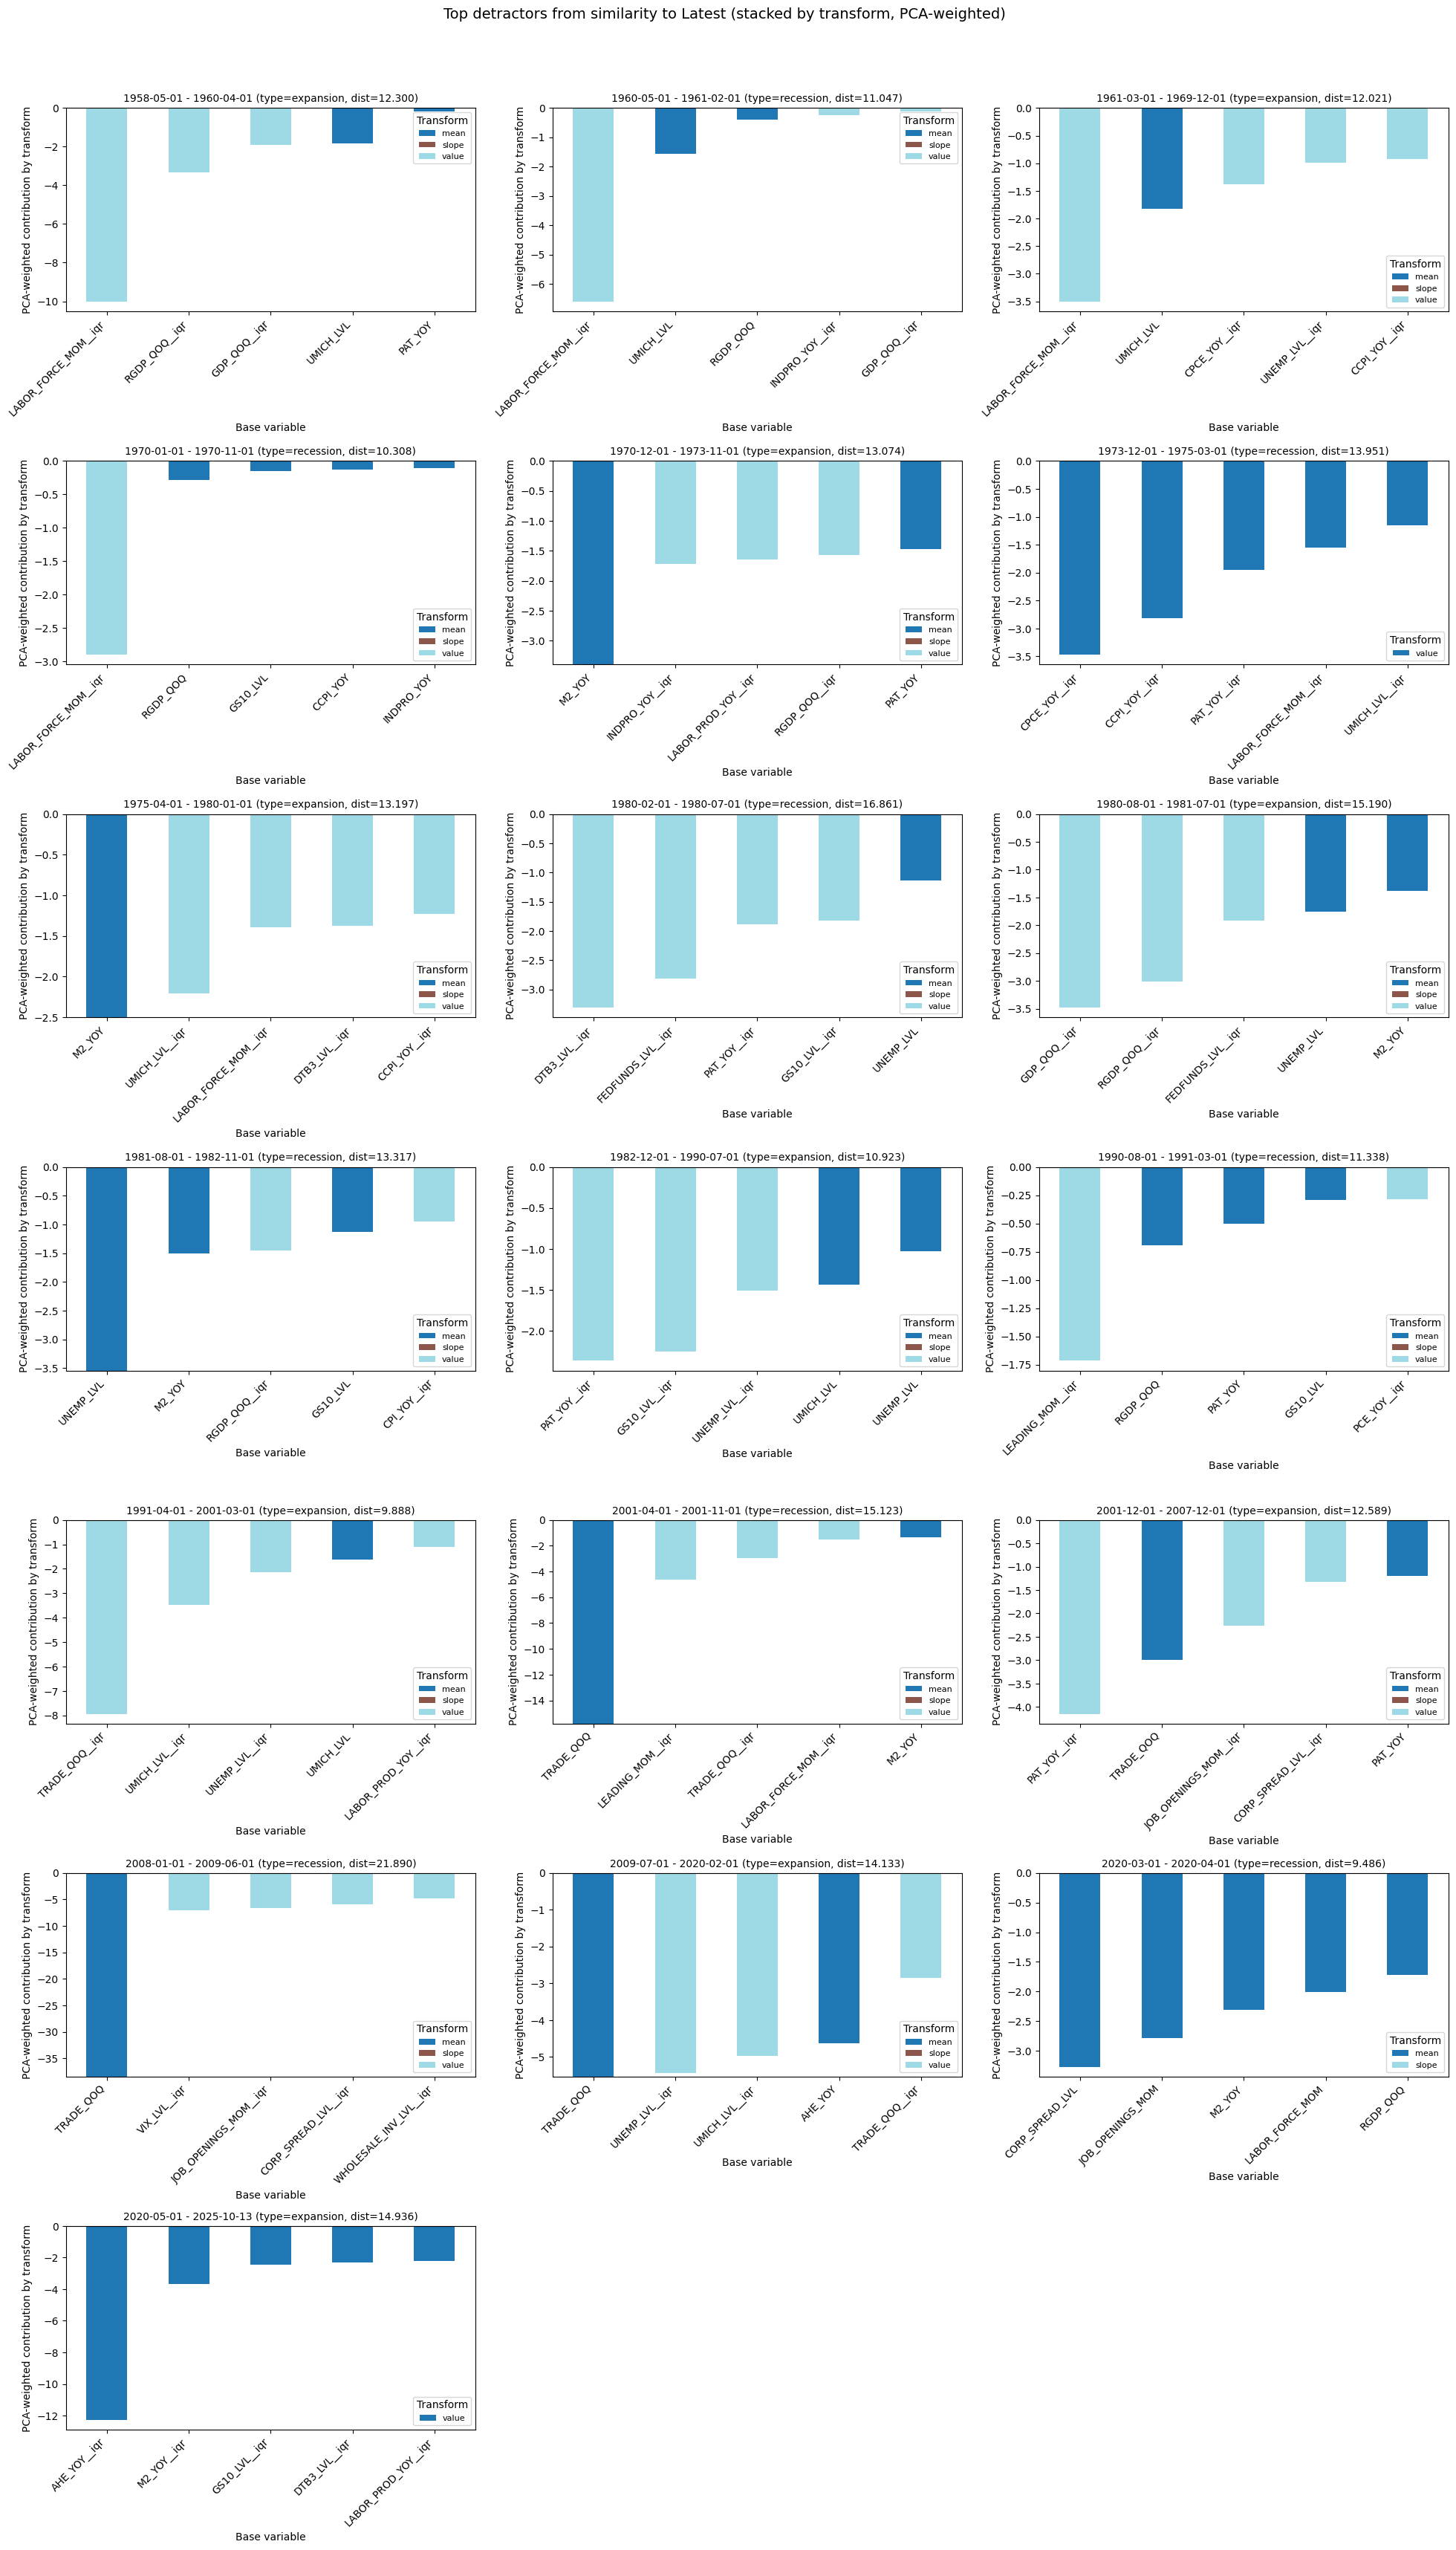

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Top detractors from similarity (stacked by transform per base)
TOP_N_DETRACTORS = 5
PLOT_ALL_CYCLES = True  # False = only nearest; True = all historical cycles
EPS = 1e-12

# prerequisites
assert all(v in globals() for v in ['nearest','labels','Xc_scl','Xl_scl','X_cycles','pca','Y_label','cycles']), "Missing prerequisites."

feat_index = pd.Index(X_cycles.columns)

# Parse columns into base variable and transform suffix
KNOWN_STATS_ORDER = ['mean','std','min','max','last','q10','q90','median','slope','skew','kurt']
KNOWN_STATS = set(KNOWN_STATS_ORDER)
def split_col(c: str):
    parts = c.rsplit('_', 1)
    if len(parts) == 2 and parts[1] in KNOWN_STATS:
        base, stat = parts[0], parts[1]
    else:
        base, stat = c, 'value'
    base = base.rstrip('_')
    return base, stat

meta = pd.DataFrame({'col': feat_index})
meta[['base','stat']] = meta['col'].apply(lambda c: pd.Series(split_col(c)))
meta = meta.set_index('col')

# PCA feature weights: sum of squared loadings per feature across retained PCs
if hasattr(pca, "components_"):
    pca_weights = pd.Series((pca.components_ ** 2).sum(axis=0), index=feat_index)
    pca_weights = pca_weights / max(pca_weights.mean(), EPS)
else:
    pca_weights = pd.Series(1.0, index=feat_index)

latest_vec_std = pd.Series(Xl_scl[0], index=feat_index)

# Build cycle type lookup to annotate titles
cycle_type_lookup = {}
start_col = next((c for c in cycles.columns if 'start' in c.lower()), cycles.columns[0])
end_col   = next((c for c in cycles.columns if 'end'   in c.lower()), cycles.columns[1])
for _, row in cycles.iterrows():
    lab = f"{row[start_col].date()} - {row[end_col].date()}"
    cycle_type_lookup[lab] = str(row['label']).lower() if 'label' in cycles.columns else 'unknown'

# Choose periods to plot
periods = list(labels) if PLOT_ALL_CYCLES else [lab for lab, _, _ in nearest]

# Optional: compute distances in PCA space for all labels (if available)
dist_by_label = {}
if 'Xc_pca' in globals() and 'Xl_pca' in globals():
    for i, lab in enumerate(labels):
        dist_by_label[lab] = float(np.linalg.norm(Xc_pca[i] - Xl_pca[0]))

# Layout
n = len(periods)
n_cols = min(3, max(1, int(np.ceil(np.sqrt(n)))))
n_rows = int(np.ceil(n / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6.6*n_cols, 4.8*n_rows), squeeze=False)
fig.suptitle(f"Top detractors from similarity to {Y_label} (stacked by transform, PCA-weighted)", y=1.02, fontsize=14)

for k, lab in enumerate(periods):
    r, c = divmod(k, n_cols)
    ax = axes[r][c]
    hist_idx = labels.index(lab)
    period_vec_std = pd.Series(Xc_scl[hist_idx], index=feat_index)

    # Per-feature contribution to similarity in z space
    contrib = (latest_vec_std * period_vec_std) * pca_weights
    dfc = meta.join(contrib.rename('contrib'))

    # Aggregate by base to find most negative bases (detractors)
    base_sum = dfc.groupby('base')['contrib'].sum()
    detractors_idx = base_sum[base_sum < 0].sort_values(ascending=True).head(TOP_N_DETRACTORS).index
    if len(detractors_idx) == 0:
        detractors_idx = base_sum.sort_values(ascending=True).head(TOP_N_DETRACTORS).index

    # Stacked contributions by transform (stat) for selected bases
    stacked = (dfc[dfc['base'].isin(detractors_idx)]
               .pivot_table(index='base', columns='stat', values='contrib', aggfunc='sum')
               .reindex(detractors_idx)
               .fillna(0.0))

    # Order transform columns for readability
    stat_order = [s for s in KNOWN_STATS_ORDER if s in stacked.columns] + [s for s in stacked.columns if s not in KNOWN_STATS_ORDER]
    stacked = stacked[stat_order]

    stacked.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
    dist_txt = f", dist={dist_by_label.get(lab):.3f}" if lab in dist_by_label else ""
    ctype = cycle_type_lookup.get(lab, "unknown")
    ax.set_title(f"{lab} (type={ctype}{dist_txt})", fontsize=10)
    ax.set_xlabel("Base variable")
    ax.set_ylabel("PCA-weighted contribution by transform")
    ax.tick_params(axis='x', rotation=45)
    for tick in ax.get_xticklabels():
        tick.set_ha('right')
    ax.axhline(0, color="black", lw=0.8, alpha=0.6)
    ax.legend(title="Transform", fontsize=8, frameon=True)

# Hide unused axes
for j in range(n, n_rows*n_cols):
    r, c = divmod(j, n_cols)
    axes[r][c].axis('off')

fig.tight_layout()
plt.show()

## inspect

In [139]:
# Inspect per-transform contributions for one base and period
base = 'LABOR_PROD_YOY'
lab = next(l for l in labels if '1991-04' in l)  # or set exact label, e.g. '1990-07-01 - 1991-03-01'

feat_index = pd.Index(X_cycles.columns)  # ensure in scope
hist_idx = labels.index(lab)
latest_z = pd.Series(Xl_scl[0], index=feat_index)
period_z = pd.Series(Xc_scl[hist_idx], index=feat_index)

df_dbg = meta.copy()  # has ['base','stat'] indexed by feature col
df_dbg['latest_z'] = latest_z
df_dbg['period_z'] = period_z
df_dbg['w'] = pca_weights
df_dbg = df_dbg[df_dbg['base'] == base].copy()

# add raw values (for sanity)
df_dbg['raw_latest'] = X_cycles.loc['Latest', df_dbg.index]
df_dbg['raw_period'] = X_cycles.loc[lab, df_dbg.index]

# per-transform contribution
df_dbg['prod'] = df_dbg['latest_z'] * df_dbg['period_z']
df_dbg['contrib'] = df_dbg['prod'] * df_dbg['w']

print(f"Period: {lab} | Base: {base}")
print(df_dbg[['stat','raw_latest','raw_period','latest_z','period_z','prod','w','contrib']].sort_values('contrib'))
print("Sum over transforms (base bar shown in plot):", df_dbg['contrib'].sum())

Period: 1991-04-01 - 2001-03-01 | Base: LABOR_PROD_YOY
                        stat  raw_latest  raw_period  latest_z  period_z  \
col                                                                        
LABOR_PROD_YOY__slope  slope         NaN    0.000382  0.000000  0.403598   
LABOR_PROD_YOY__mean    mean    0.062646    0.062733  0.348937  0.352476   

                           prod         w   contrib  
col                                                  
LABOR_PROD_YOY__slope  0.000000  1.242840  0.000000  
LABOR_PROD_YOY__mean   0.122992  1.171256  0.144055  
Sum over transforms (base bar shown in plot): 0.14405509588642346


# Monthly Obs.

In [140]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

def assign_cycle_label(df, cycles):
    labels = []
    for dt in df.index:
        label = None
        for _, row in cycles.iterrows():
            if row['start_date'] <= dt <= row['end_date']:
                label = row['label']
                break
        labels.append(label if label is not None else 'unknown')
    return pd.Series(labels, index=df.index)

df_labeled = df.copy()
df_labeled['cycle_label'] = assign_cycle_label(df_labeled, cycles)

# Impute missing values with mean (do not drop any rows)
feature_cols = [c for c in df_labeled.columns if c != 'cycle_label']
X = df_labeled.iloc[:-12][feature_cols].copy()
X = X.fillna(X.mean()) # fill missing values with mean
y = (df_labeled.iloc[:-12]['cycle_label'] == 'recession').astype(int)

X_latest = df_labeled.iloc[[-1]][feature_cols].copy()
X_latest = X_latest.fillna(X.mean())

clf = LogisticRegression()
clf.fit(X, y)
latest_pred = clf.predict(X_latest)[0]
latest_prob = clf.predict_proba(X_latest)[0][1]

assert latest_pred in [0, 1]
assert 0.0 <= latest_prob <= 1.0
print(f"Test passed: Latest row predicted as: {'recession' if latest_pred else 'expansion'} (prob={latest_prob:.2f})")

Test passed: Latest row predicted as: expansion (prob=0.23)
